<a href="https://colab.research.google.com/github/KalkiDh/WineQualityPrediction/blob/main/WineQualityPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Setup libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA



In [5]:
df = pd.read_csv('/content/WineQT.csv')
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


Data Preprocessing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [9]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [10]:
df['quality'] = df['quality'].apply(lambda x: 1 if x >= 6 else 0)  #Convert Quality to Binary Classification

print(df['quality'].value_counts())

quality
1    621
0    522
Name: count, dtype: int64


In [11]:
#Feature Scaling
scaler = StandardScaler()
X = df.drop(columns=['quality', 'Id'])
y = df['quality']

X_scaled = scaler.fit_transform(X)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


**Data Visualization**

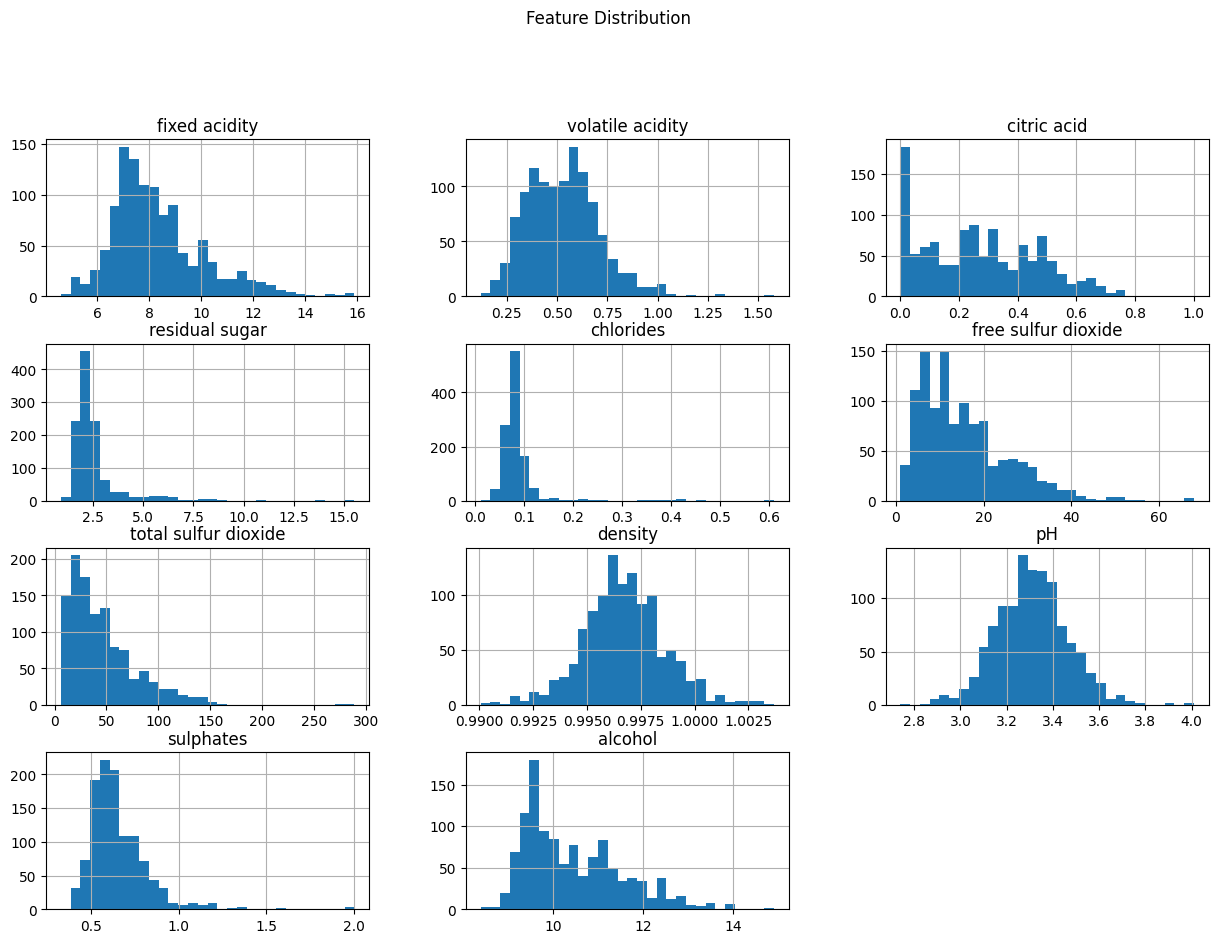

In [13]:
df.drop(columns=['quality', 'Id']).hist(bins=30, figsize=(15, 10))
plt.suptitle("Feature Distribution", y=1.01)
plt.show()


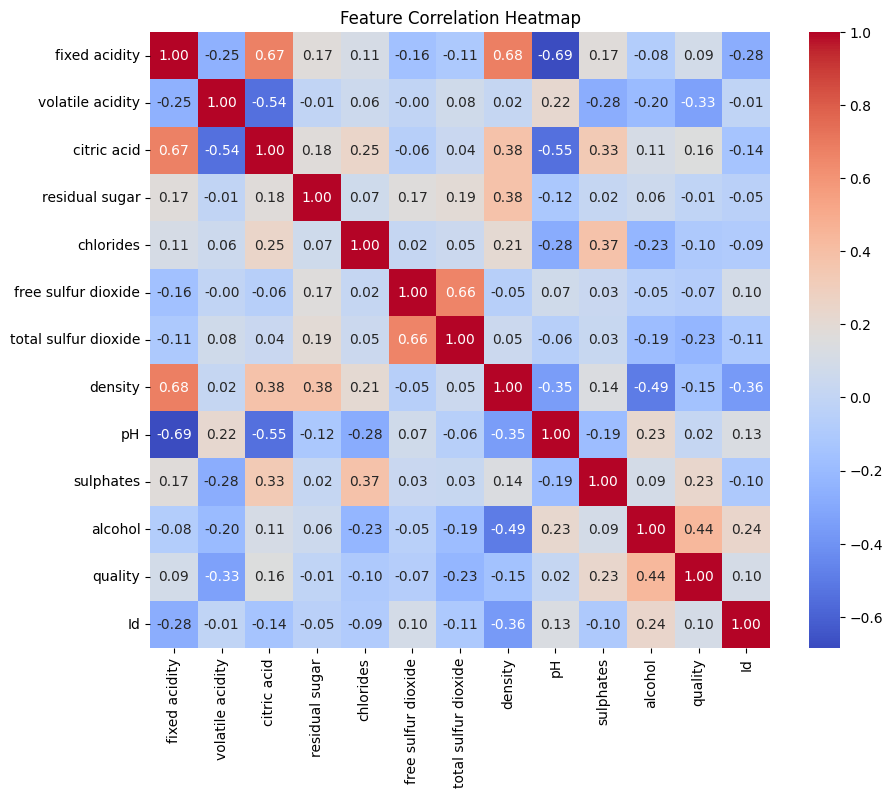

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


Supervised Learning

In [16]:
#Decision Tree Classifier
dt_model = DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=42)

Decision Tree Metrics:
Accuracy: 0.7248908296943232
Precision: 0.732824427480916
Recall: 0.7741935483870968
F1-score: 0.7529411764705882


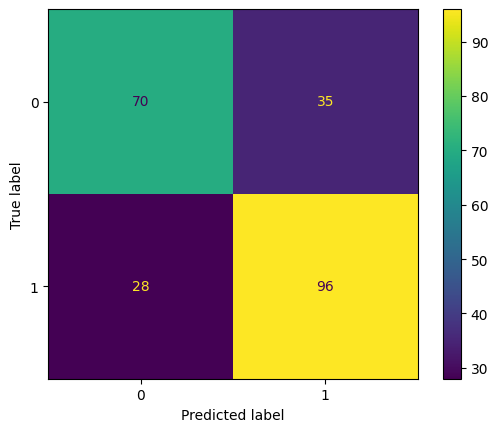

In [17]:
y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1-score:", f1_score(y_test, y_pred_dt))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(dt_model, X_test, y_test)
plt.show()

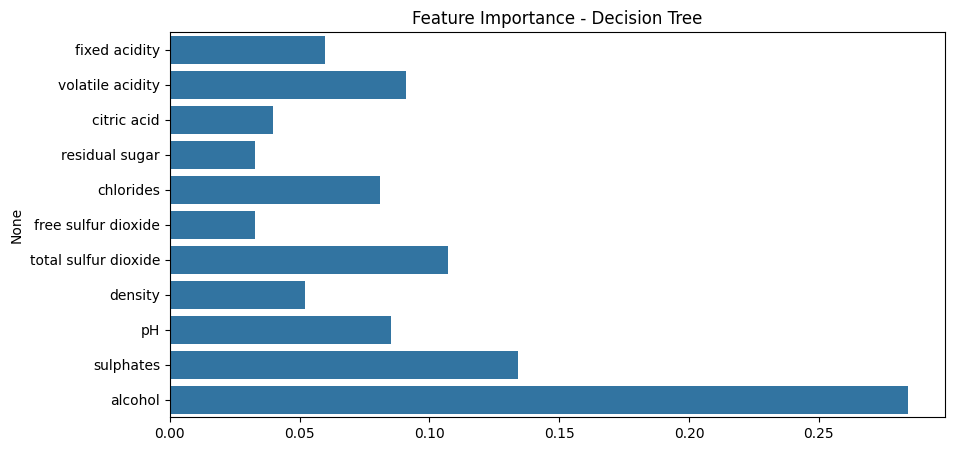

In [18]:
plt.figure(figsize=(10, 5))
sns.barplot(x=dt_model.feature_importances_, y=X.columns)
plt.title("Feature Importance - Decision Tree")
plt.show()

In [19]:
#Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_split=5, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=15, min_samples_split=5, random_state=42)

Random Forest Metrics:
Accuracy: 0.8165938864628821
Precision: 0.8014705882352942
Recall: 0.8790322580645161
F1-score: 0.8384615384615385


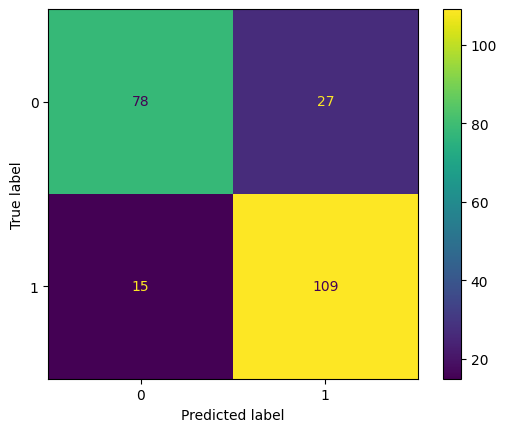

In [20]:
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))

ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test)
plt.show()


Unsupervised Learning (K-Means Clustering)

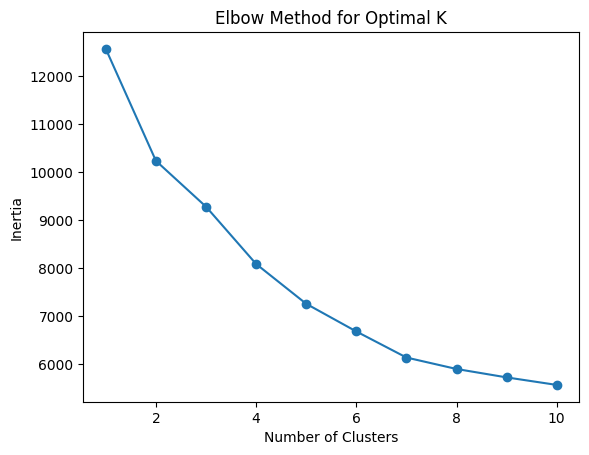

In [21]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [22]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)


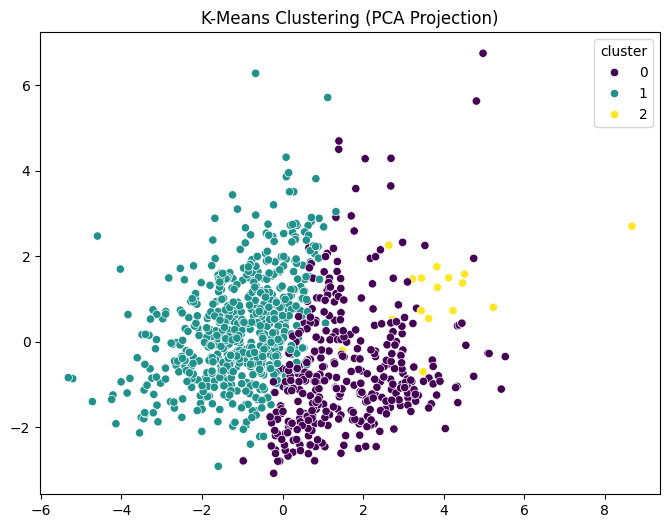

In [23]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['cluster'], palette='viridis')
plt.title('K-Means Clustering (PCA Projection)')
plt.show()


In [24]:
import joblib

joblib.dump(dt_model, 'decision_tree_model.pkl')
joblib.dump(rf_model, 'random_forest_model.pkl')


['random_forest_model.pkl']